In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sb
import pandas as pd

# REFERENCES
# Plotting with Pandas: http://jonathansoma.com/lede/algorithms-2017/classes/fuzziness-matplotlib/understand-df-plot-in-pandas/
# Regression, etc.: https://becominghuman.ai/linear-regression-in-python-with-pandas-scikit-learn-72574a2ec1a5

In [2]:
# What will happen?

# Data=pd.read_csv('data/global_temperature_anomaly.csv')

# Oops! You have to look at the data
# OK boss, I'm going to the command line

# Your friends:

# cd              -- change directory
# cd ..           -- go up one level
# cd -            -- go back to where you were
# head FILE       -- look at the first few lines of FILE
# head -12 FILE   -- look at the first 12 lines of FILE
# tail FILE       -- look at last few lines of FILE
# tail -8 FILE    -- what does this do?
# grep 1929 FILE  -- display lines containing 1929
# grep -v '#'     -- display all line not containing '#'
# more FILE       -- look at a file
# cat FILE        -- copy FILE to terminal (stdout)
# cat FILE > FF   -- copy FILE to FF

# Combining things

# grep -v '#' > anomalies-good.csv.  -- We just cleaned our data in one line!!
#  -- How would we do this with the sealevel data?


df=pd.read_csv('data/anomalies-good.csv', header=None, names=["year", "anomaly"])
df.head(10)
df.sample(5)

# df=pd.read_csv('data/anomalies-good.csv', names=["year", "anomaly"])
# df.head(10)
# Alternatives: omit names..., use header=None, ...

,year,anomaly
135,2015,0.91
99,1979,0.22
58,1938,-0.02
8,1888,-0.15
86,1966,-0.02


In [ ]:
# Another way to get out
df2=pd.read_csv('data/global_temperature_anomaly.csv',skiprows=7, header=None)
df2.head(10)

In [ ]:
# df.plot()
# Oops! that didn't work!
df.plot(x='year')

In [11]:
# The below won't work:
df3 = pd.read_csv('data/sea_level3.txt', sep=r"\s+", header=None)

# Let's try this:
# df3 = pd.read_csv('data/sea_level3.txt', sep=r"\s+",header=None)


In [12]:
df3.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,11,1993.011526,466462,337277.00,-37.24,92.66,-37.02,-37.24,92.66,-37.02,-37.55
1,0,12,1993.038692,460889,334037.31,-40.35,95.39,-38.20,-40.34,95.39,-38.19,-38.06
2,0,13,1993.065858,472123,342416.09,-40.17,92.29,-38.28,-40.16,92.29,-38.27,-37.60


In [13]:
"""
HDR 1 altimeter type 0=dual-frequency  999=single frequency (ie Poseidon-1)
HDR 2 merged file cycle #
HDR 3 year+fraction of year (mid-cycle)
HDR 4 number of observations
HDR 5 number of weighted observations
HDR 6 GMSL (Global Isostatic Adjustment (GIA) not applied) variation (mm) with respect to 20-year TOPEX/Jason collinear mean reference
HDR 7 standard deviation of GMSL (GIA not applied) variation estimate (mm)
HDR* 8 smoothed (60-day Gaussian type filter) GMSL (GIA not applied) variation (mm)  with respect to 20-year mean
HDR* 9 GMSL (Global Isostatic Adjustment (GIA) applied) variation (mm) )  with respect to 20-year mean
HDR 10 standard deviation of GMSL (GIA applied) variation estimate (mm)
HDR* 11 smoothed (60-day Gaussian type filter) GMSL (GIA applied) variation (mm) )  with respect to 20-year mean
HDR* 12 moothed (60-day Gaussian type filter) GMSL (GIA applied) variation (mm); annual and semi-annual signal removed )  with respect to 20-year mean
"""
meta = ['alt', 'cycle', 'year', 'obs', 'wobs', 'GMSL', 'devGMSL', 'smGMSL', 'GMSL2', 'devGMSL2', 'smGMSL2', 'sm2GMSL2']
print("len(meta) =", len(meta))
df3 = pd.read_csv('data/sea_level3.txt', sep=r"\s+", names=meta)
df3.head(5)

len(meta) = 12


,alt,cycle,year,obs,wobs,GMSL,devGMSL,smGMSL,GMSL2,devGMSL2,smGMSL2,sm2GMSL2
0,0,11,1993.011526,466462,337277.00,-37.24,92.66,-37.02,-37.24,92.66,-37.02,-37.55
1,0,12,1993.038692,460889,334037.31,-40.35,95.39,-38.20,-40.34,95.39,-38.19,-38.06
2,0,13,1993.065858,472123,342416.09,-40.17,92.29,-38.28,-40.16,92.29,-38.27,-37.60
3,0,14,1993.093025,421377,306050.59,-41.92,96.20,-38.56,-41.89,96.19,-38.54,-37.45
4,0,15,1993.120191,459548,331094.09,-36.89,94.64,-37.87,-36.85,94.63,-37.83,-36.44


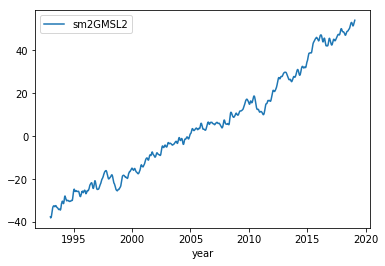

In [14]:
df3.plot(x='year', y='sm2GMSL2')

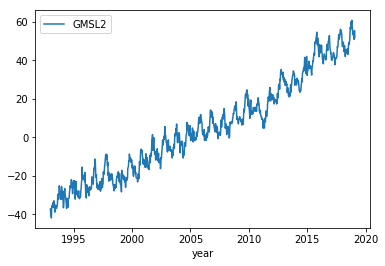

In [15]:
df3.plot(x='year', y='GMSL2')

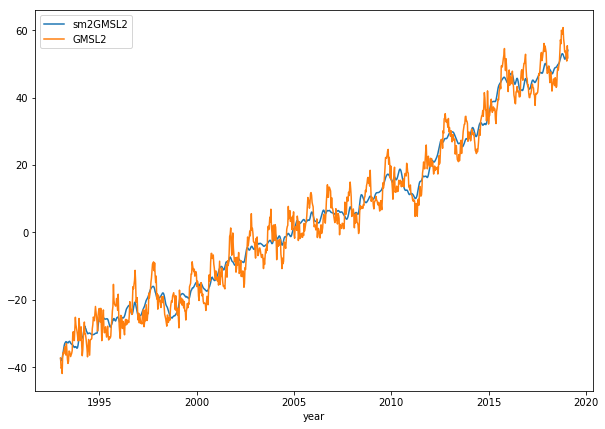

In [17]:
fig = df3.plot(x='year', y=['sm2GMSL2','GMSL2'],figsize=(10,7)).get_figure()
fig.savefig('sealevel.png')

# seaplot.savefig('test.pdf')
# What are the peaks? Seasonal?
# Can you write a program to extract the maxima? The minima?

In [18]:
years = df3['year']
sealevel = df3['sm2GMSL2']

In [19]:
type(years)

pandas.core.series.Series

In [ ]:
plt.plot(years, sealevel)    

In [20]:
m, b = np.polyfit(years, sealevel, 1)
m, b

(3.266906352135131, -6548.754331647561)

In [21]:
def y(x):
    return m*x + b
y(2019), y(2049)

(47.12959331326783, 145.13678387732216)

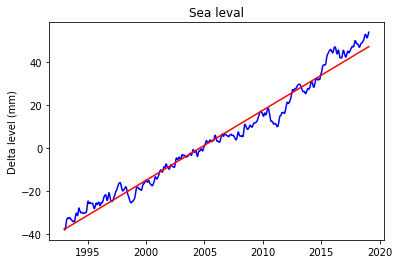

In [22]:
linfit = list(map(lambda x: y(x), years))

plt.plot( years, sealevel, color='blue', linestyle='solid')
plt.plot( years, linfit, color='red', linestyle='solid')
plt.title("Sea leval")
plt.ylabel("Delta level (mm)")

plt.show()